In [ ]:
###DBscan
!pip install mglearn
import mglearn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("cluster membership:\n{}".format(clusters))

cluster membership:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


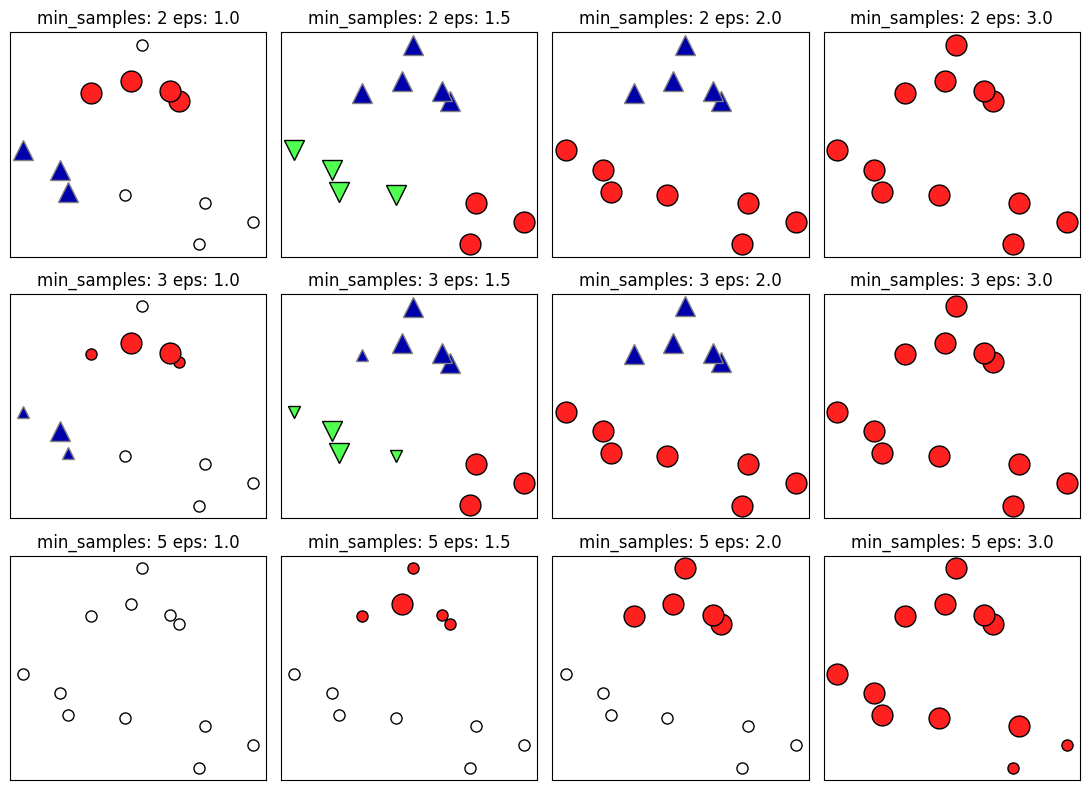

In [ ]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

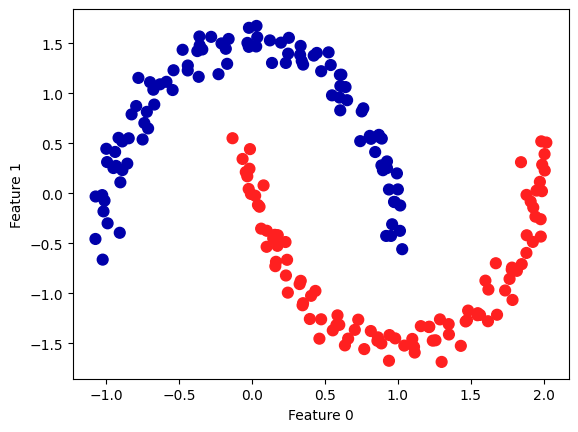

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

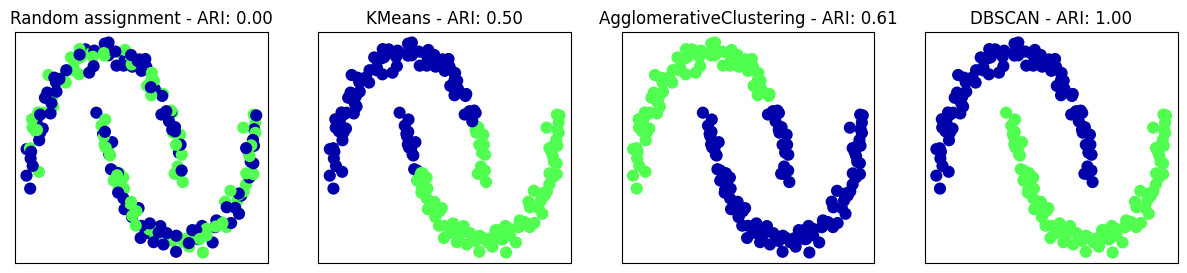

In [ ]:
### compare and evaluate the clusters
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
 DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
 cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
 adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):

 # plot the cluster assignments and cluster centers
 clusters = algorithm.fit_predict(X_scaled)
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
 cmap=mglearn.cm3, s=60)
 ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
 adjusted_rand_score(y, clusters)))

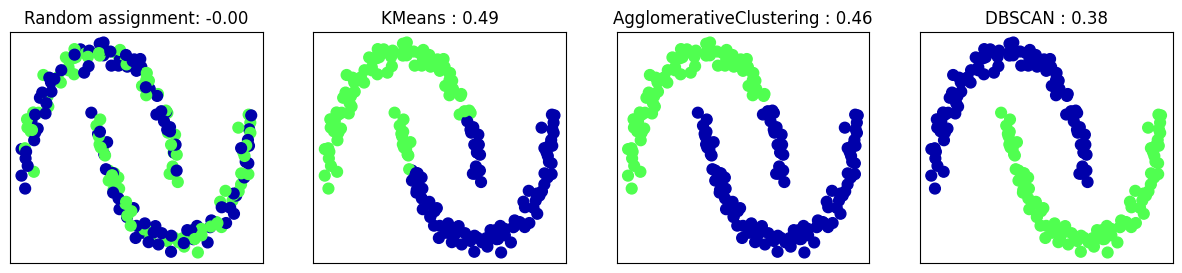

In [ ]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
 cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
 silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
 DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
 clusters = algorithm.fit_predict(X_scaled)

 # plot the cluster assignments and cluster centers
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
 s=60)
 ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
 silhouette_score(X_scaled, clusters)))


In [ ]:
### comparing on faces dataset
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(people.data)
X_pca = pca.transform(people.data)
print("X_pca.shape: {}".format(X_pca.shape))

X_pca.shape: (3023, 100)


In [ ]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("labels:\n", labels)
np.unique(labels)

labels:
 [-1 -1 -1 ... -1 -1 -1]


array([-1])

In [ ]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("labels:\n", labels)
np.unique(labels)

labels:
 [-1 -1 -1 ... -1 -1 -1]


array([-1])

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("labels:\n", labels)
np.unique(labels)

labels:
 [0 0 0 ... 0 0 0]


array([-1,  0])

In [ ]:
print("cluster sizes:\n{}".format(np.bincount(labels + 1)))

cluster sizes:
[  41 2982]


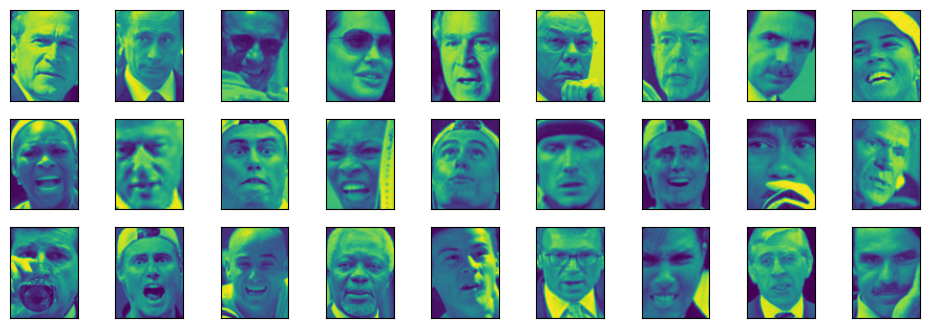

In [ ]:
X_people = people.data
y_people = people.target
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(12, 4))

for image, ax in zip(noise, axes.ravel()):
 ax.imshow(image.reshape(people.images[0].shape),vmin=0, vmax=1)

In [ ]:
for eps in [1, 3, 5, 7, 9, 11, 13, 15]:
 dbscan = DBSCAN(min_samples=3, eps=eps)
 labels = dbscan.fit_predict(X_pca)
 print("eps:", eps)
 print("cluster sizes:\n{}".format(np.bincount(labels + 1)))

eps: 1
cluster sizes:
[3023]
eps: 3
cluster sizes:
[3023]
eps: 5
cluster sizes:
[3023]
eps: 7
cluster sizes:
[2794  191    3    4    4    5    3    3    3    3    4    3    3]
eps: 9
cluster sizes:
[1618 1399    3    3]
eps: 11
cluster sizes:
[ 542 2481]
eps: 13
cluster sizes:
[ 159 2864]
eps: 15
cluster sizes:
[  41 2982]


labels:
 [-1 -1 -1 ... -1 -1  0]


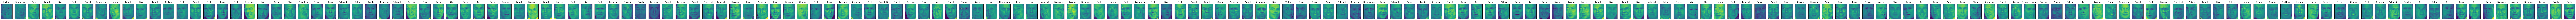

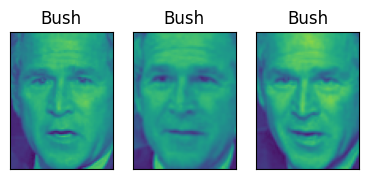

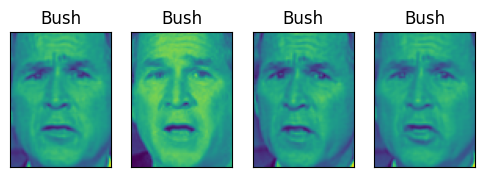

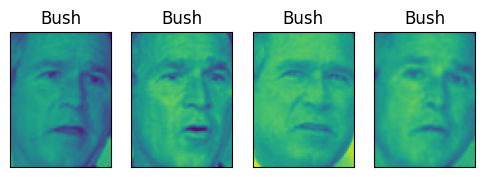

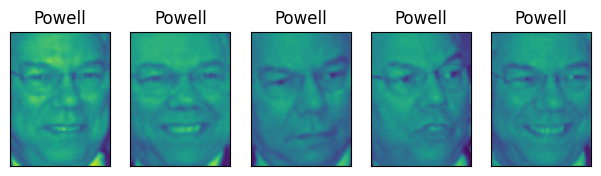

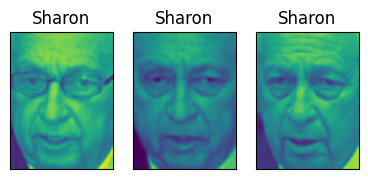

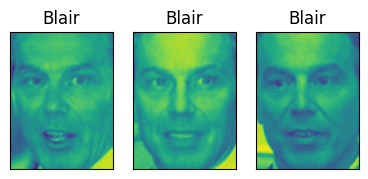

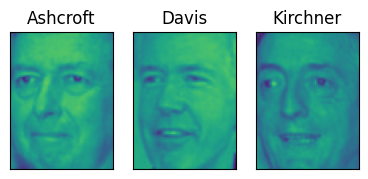

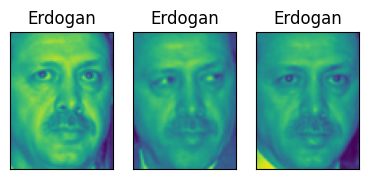

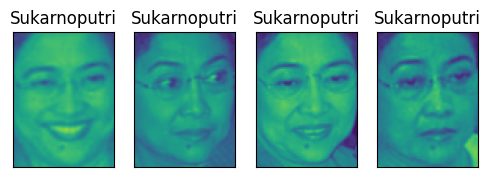

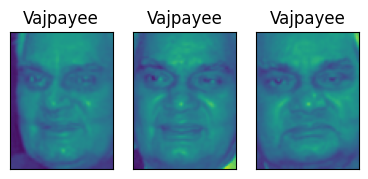

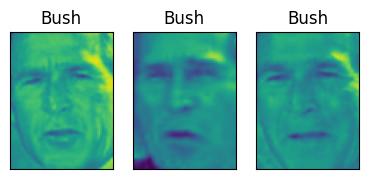

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
image_shape = people.images[0].shape

for cluster in range(max(labels) + 1):
 mask = labels == cluster
 n_images = np.sum(mask)
 fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
 subplot_kw={'xticks': (), 'yticks': ()})
 for image, label, ax in zip(X_people[mask], y_people[mask], axes):
  ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
  ax.set_title(people.target_names[label].split()[-1])


In [ ]:
km = KMeans(n_clusters=10, random_state=0)
labels = km.fit_predict(X_pca)
print("cluster sizes:\n{}".format(np.bincount(labels)))

cluster sizes:
[298 234 140 320 251 244 385 331 565 255]


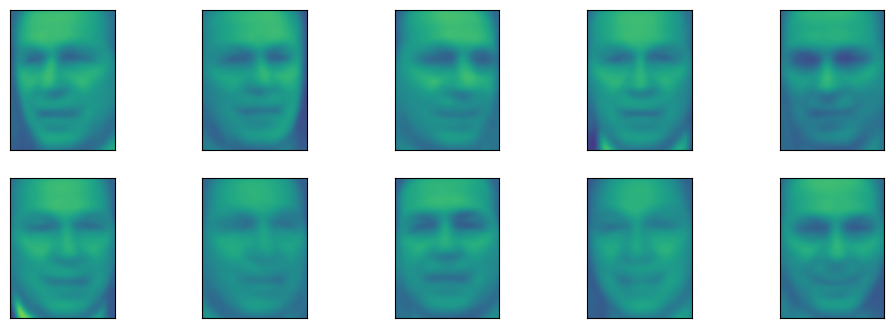

In [ ]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(12, 4))

for center, ax in zip(km.cluster_centers_, axes.ravel()):
 ax.imshow(pca.inverse_transform(center).reshape(image_shape),
 vmin=0, vmax=1)

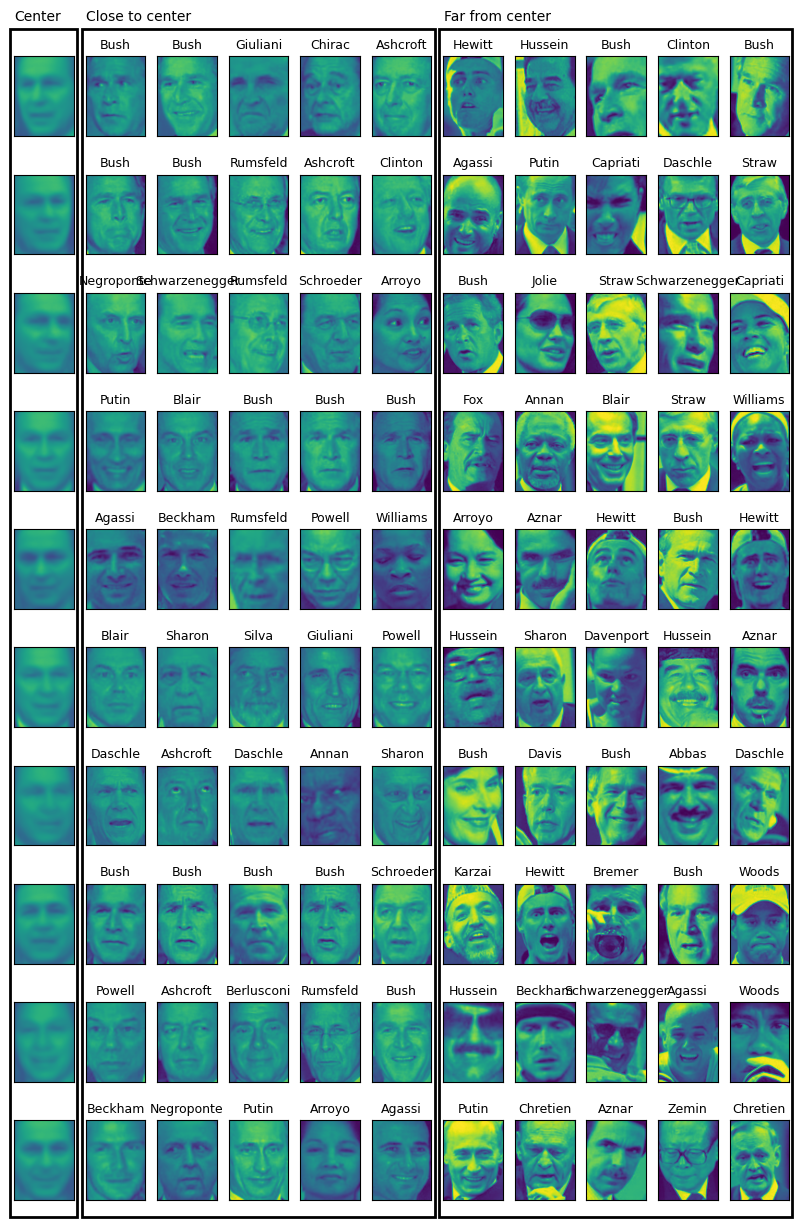

In [ ]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
 y_people, people.target_names)

In [ ]:
### agglomerative clustring

agglomera = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomera.fit_predict(X_pca)
print("cluster sizes:\n{}".format(np.bincount(labels)))

cluster sizes:
[998 880 100 391 158 172 110  40 151  23]


Text(0, 0.5, 'cluster distance')

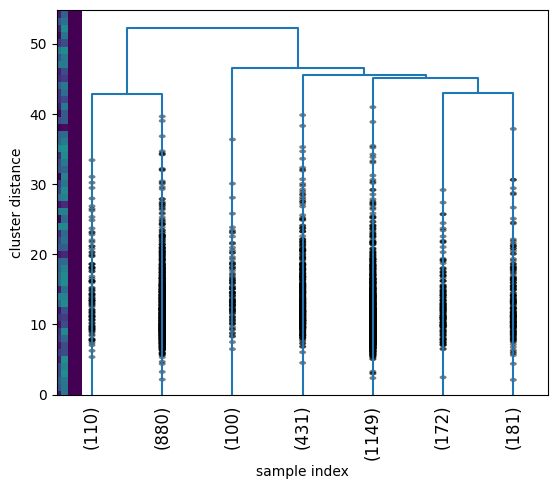

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
plt.imshow(linkage_array, interpolation='none')
dendro = dendrogram(linkage_array, p=7, truncate_mode='lastp',
 leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.xlabel("sample index")
plt.ylabel("cluster distance")

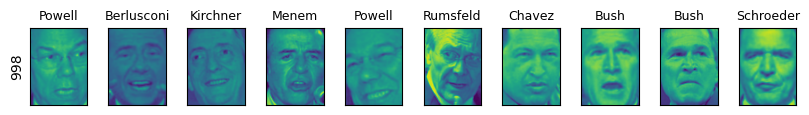

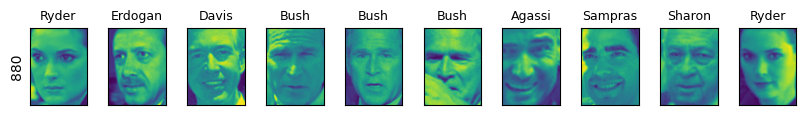

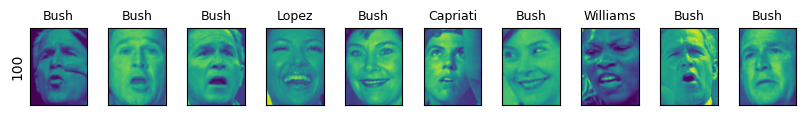

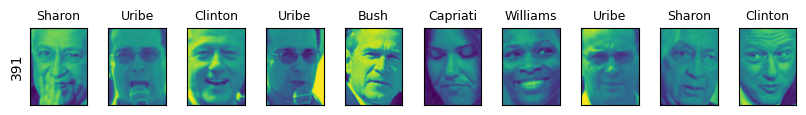

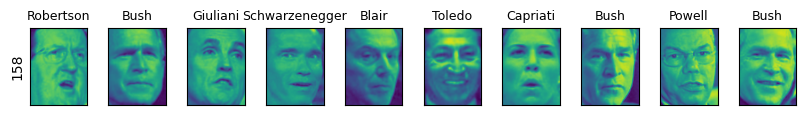

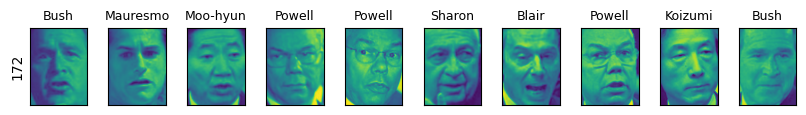

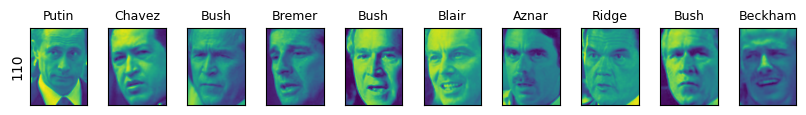

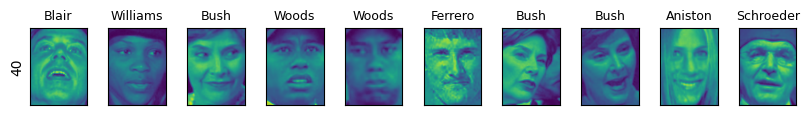

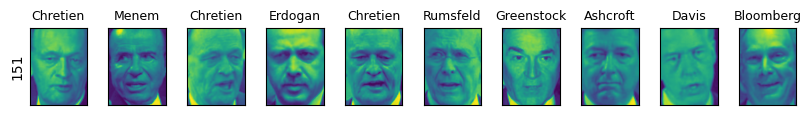

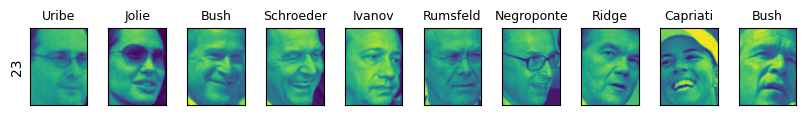

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
  mask = labels_agg == cluster
  fig, axes = plt.subplots(1, 10, figsize=(10, 1), subplot_kw={'xticks': (), 'yticks': ()})
  axes[0].set_ylabel(np.sum(mask))
  for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

cluster sizes agglomerative clustering: [134  69  74  40 177  62  65  48  96  12  39 373  25 204 147  26  41  45
 151  23 113  34  42  20  48  54  94  64  46 112  94  24  73  72  76  47
  78   6  11  64]


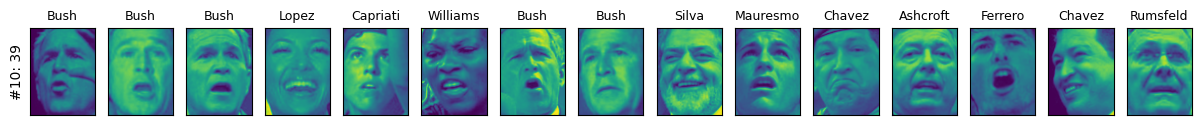

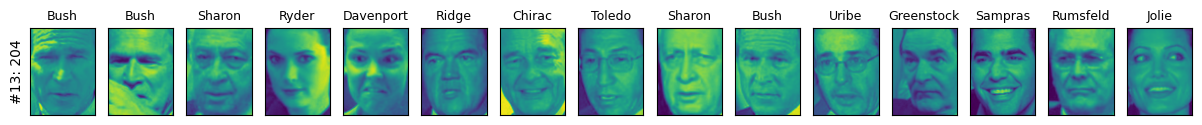

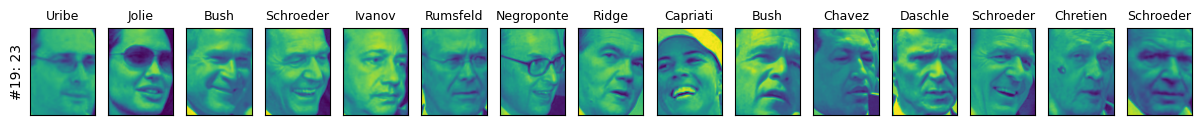

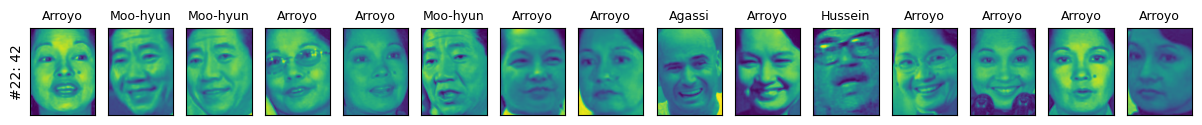

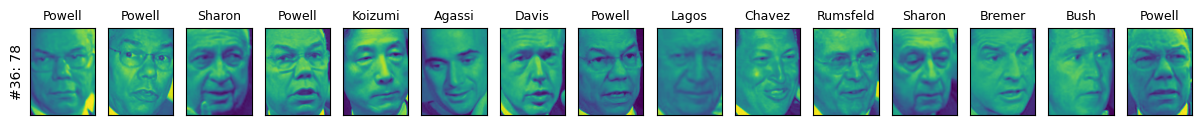

In [ ]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]:
  mask = labels_agg == cluster
  fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
  figsize=(15, 8))
  cluster_size = np.sum(mask)
  axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
  for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
    labels_agg[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1],
    fontdict={'fontsize': 9})
  for i in range(cluster_size, 15):
    axes[i].set_visible(False)
